# Live Session 8 (16/09/2022) - Advanced Visualization
#### By Ika Nurfitriani (PYTN-KS10-008)
Di pertemuan ini akan membahas visualisasi tingkat lanjut menggunakan Python. Terdapat beberapa hal yang akan dipelajari yaitu word cloud, regression plot, membuat peta dan membuat marker pada peta.

**Install library yang dibutuhkan seperti wordcloud dan Folium**

In [1]:
! pip install wordcloud
! pip install folium

**Import library yang dibutuhkan**

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import seaborn as sns
import folium

from folium import plugins

**Open file**

In [3]:
alice_novel = open('alice_novel.txt', 'r').read()

**Delete redundant stopword**

In [4]:
stopwords = set(STOPWORDS)

**Inisiasi wordcloud**

In [5]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

**Generate wordcloud**

In [6]:
alice_wc.generate(alice_novel)

**Tampilkan wordcloud**

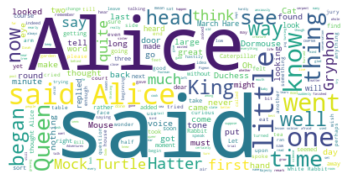

In [7]:
plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

**Metode fig**

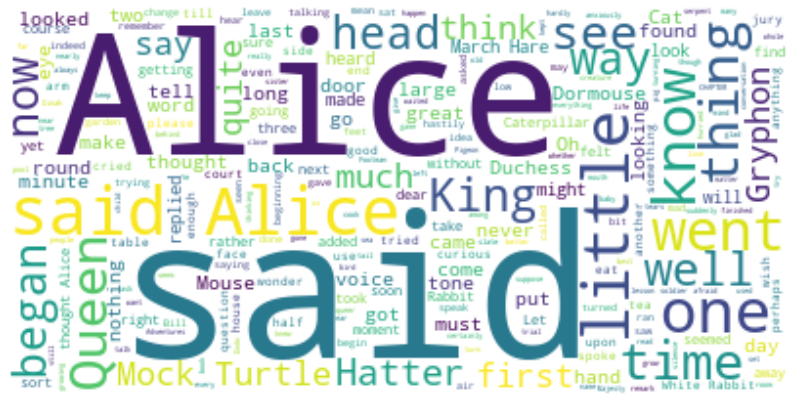

In [8]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

In [9]:
stopwords.add('said')

**Inisiasi wordcloud**

In [10]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

**Generate wordcloud**

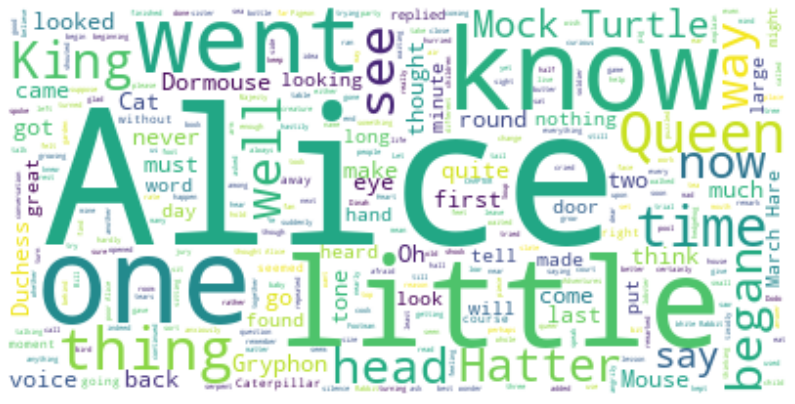

In [11]:
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

## Masking

**Save mask to alice_mask**

In [12]:
alice_mask = np.array(Image.open("alice_mask.png"))

**Look masking**

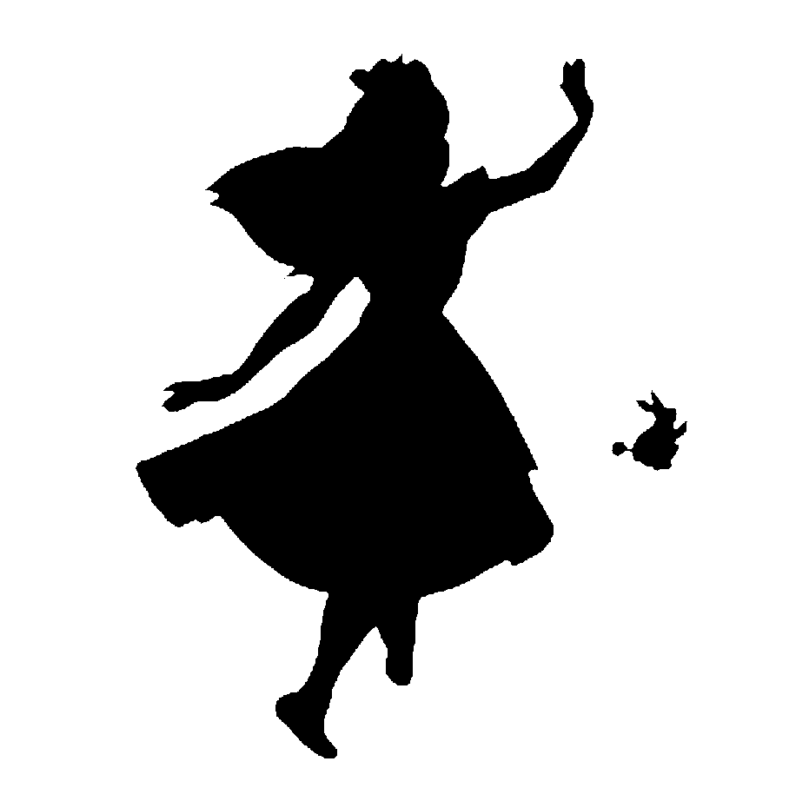

In [13]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear');
plt.axis('off');

**Inisiasi wordcloud**

In [14]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)

**Generate wordcloud**

In [15]:
alice_wc.generate(alice_novel)

**Display the wordcloud**

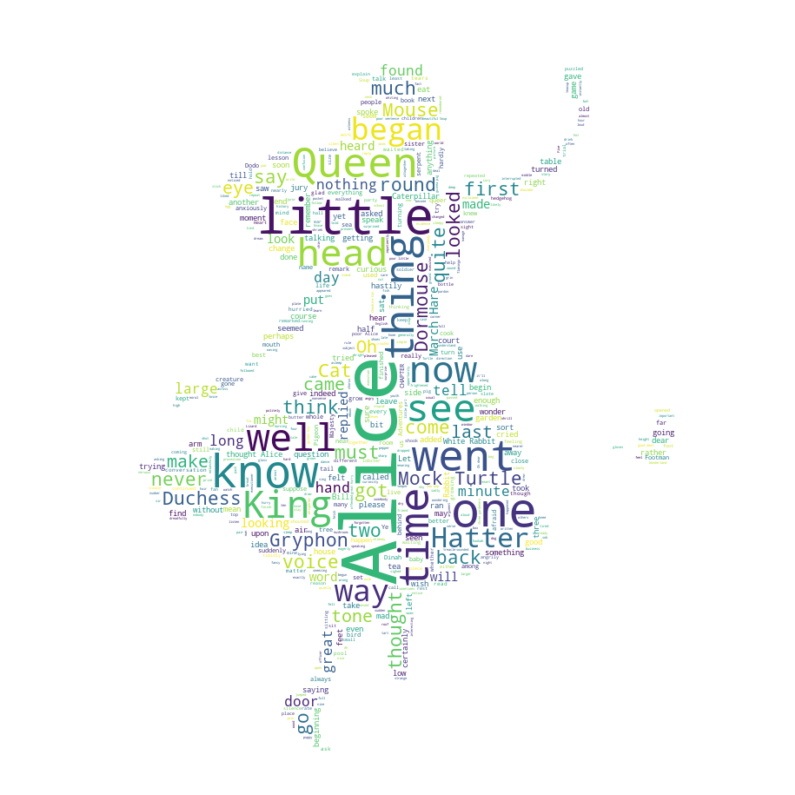

In [16]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

## Regression Plot

**Membaca dataset**

In [17]:
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**Bersihkan data | Hapus kolom yang tidak diperlukan**

In [18]:
kol = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(kol, axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


**Rename column**

In [19]:
df_can.rename(columns={'OdName':'Country',
                       'AreaName':'Continent',
                       'RegName':'Region'}, inplace=True)

**Add total column**

In [20]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\Ika N\AppData\Local\Temp\ipykernel_4380\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [21]:
years = np.arange(1980, 2014)

**Use the sum() method to get the total population per year**

In [22]:
df_total = pd.DataFrame(df_can[years].sum())

**Change the years to type float (useful for regression later on)**

In [23]:
df_total.index = map(float, df_total.index)

**Reset the index to put in back in as a column in the df_tot dataFrame**

In [24]:
df_total.reset_index(inplace=True)

**Rename columns**

In [25]:
df_total.columns = ['years', 'total']

**View the final dataFrame**

In [26]:
df_total.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


**Create regression plot**

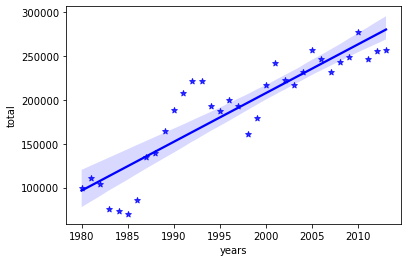

In [27]:
sns.regplot(x='years', y='total', data=df_total, color='blue', marker='*');

## Pengenalan Folium

**Definisikan world map**

In [28]:
world_map = folium.Map()

**Tampilkan**

In [29]:
world_map

**Define the world map centered around Bundaran HI with a middle zoom level**

In [30]:
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], zoom_start=20)

**Display world map**

In [31]:
world_map

**Create a Stamen Terrain map of the world centered around Bundaran HI**

In [32]:
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], 
                       zoom_start=20,
                       tiles='Stamen Terrain')

**Display map**

In [33]:
world_map

**Open data**

In [34]:
url = "https://github.com/ardhiraka/PFDS_sources/raw/master/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df_incidents = pd.read_csv(url)
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


**View the first 5 items in the dataset**

In [35]:
df_incidents.shape

(150500, 13)

**Data limit is only the top 100**

In [36]:
limit = 100
df_incidents = df_incidents.iloc[:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


**How many entries are in our dataset**

In [37]:
df_incidents.shape

(100, 13)

**San Francisco latitude and longitude values**

In [38]:
latitude = 37.77
longitude = -122.43

**Generate san fransisco map**

In [39]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

**Display the map of San Francisco**

In [40]:
sanfran_map

**Inisiasi fitur grup**

In [41]:
incidents = folium.map.FeatureGroup()

**Looping ke dataset untuk long dan lat nya**

In [42]:
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

**Add incidents to map**

In [43]:
sanfran_map.add_child(incidents)

**Inisiasi fitur grup**

In [44]:
incidents = folium.map.FeatureGroup()

**Looping ke dataset untuk long dan lat nya**

In [45]:
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

**Add pop-up text to each marker on the map**

In [46]:
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Descript)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

**Add incidents to map**

In [47]:
sanfran_map.add_child(incidents)

**Create map and display it**

In [48]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

**Loop through the 100 crimes and add each to the map**

In [49]:
for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6,
    ).add_to(sanfran_map)

**Show map**

In [50]:
sanfran_map

**Let's start again with a clean copy of the map of San Francisco**

In [51]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

**Instantiate a mark cluster object for the incidents in the dataFrame**

In [52]:
incidents = plugins.MarkerCluster().add_to(sanfran_map)

**Loop through the dataFrame and add each data point to the mark cluster**

In [53]:
for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            popup=label,
            icon=None
    ).add_to(incidents)

**Display map**

In [54]:
sanfran_map